# Decision Tree

Decision Tree is used commonly for regression and classification problem.

To get the conclusion, it asks continuously yes or no question.

In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

## Control Complexity of Decision Tree

We have to control complexity in order to prevent from overfitting.

To prevent overfitting, **pruning**(pre- or post-) can be used.

Pre-pruning cosists of limitation of **max_depth** or **max_leaf**, and **apoint specific number of data point to make nodes**.

### Before pruning

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Train set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Train set accuracy: 1.000
Test set accuracy: 0.937


This is an example of overfitted model.

### After pruning

max_depth gonna be used.

It means that model limits continuous question as maximum 4.

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Train set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Train set accuracy: 0.988
Test set accuracy: 0.951


## Analyze Decision Tree

We can visualize tree by export_graphviz function.

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Malignancy", "Benign"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

In [5]:
'''
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
'''

'\nimport graphviz\n\nwith open("tree.dot") as f:\n    dot_graph = f.read()\ndisplay(graphviz.Source(dot_graph))\n'

## Feature Importance of Tree

In [6]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


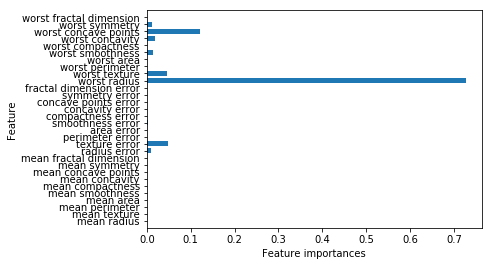

In [7]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importances")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

### Weakness

Tree can't predict data which is out of train data's range. So It is not proper to use for time series analyze

Text(0,0.5,'Price ($/Mbyte_)')

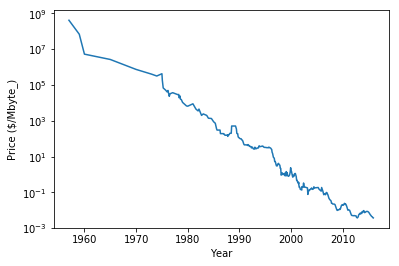

In [8]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte_)")

This is graph describing price of Ram which is transformed by log (**Log Tranformation**).

If graph with log scale, it can be easy to predict, because it draw the line as linear.



#### Decision Tree vs Linear Regression in log scale.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]

y_train = np.log(data_train.price) #Log transform

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#Return Log data
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

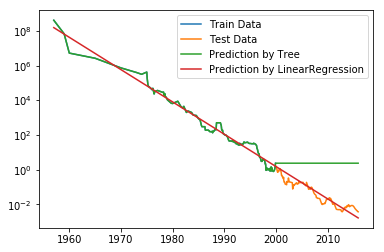

In [10]:
plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Prediction by Tree")
plt.semilogy(ram_prices.date, price_lr, label="Prediction by LinearRegression")
plt.legend()

## Summary

It is common weakness of tree algorithm that it can't predict value which is out of range with train set.

But it is easy to understand and it works well without scaling of data.

So, Normalization or Standardization is not need for Decision Tree.


And! It is usually overfitted by train data set. It doesn't generalize the model well. This is why we use ensemble model of Tree.

**Random Forest**